# Title : Mean Absolute Error & Mean Squared Error

### 🔴 Type of Content : Documentation

### 🔴 Domain : Machine Learning

### 🔴 Module : Feature Engineering and Performance Metrices

----
### Mean Absolute Error
Mean Absolute Error (l1 norm or manhattan norm): Also known as average absolute error is a performance metric that gives us the measure of error between the observed value and true value.

This error method basically gives us the 'average' of the 'absolute' error values between predicted and true values.

Visualization is something like this ->
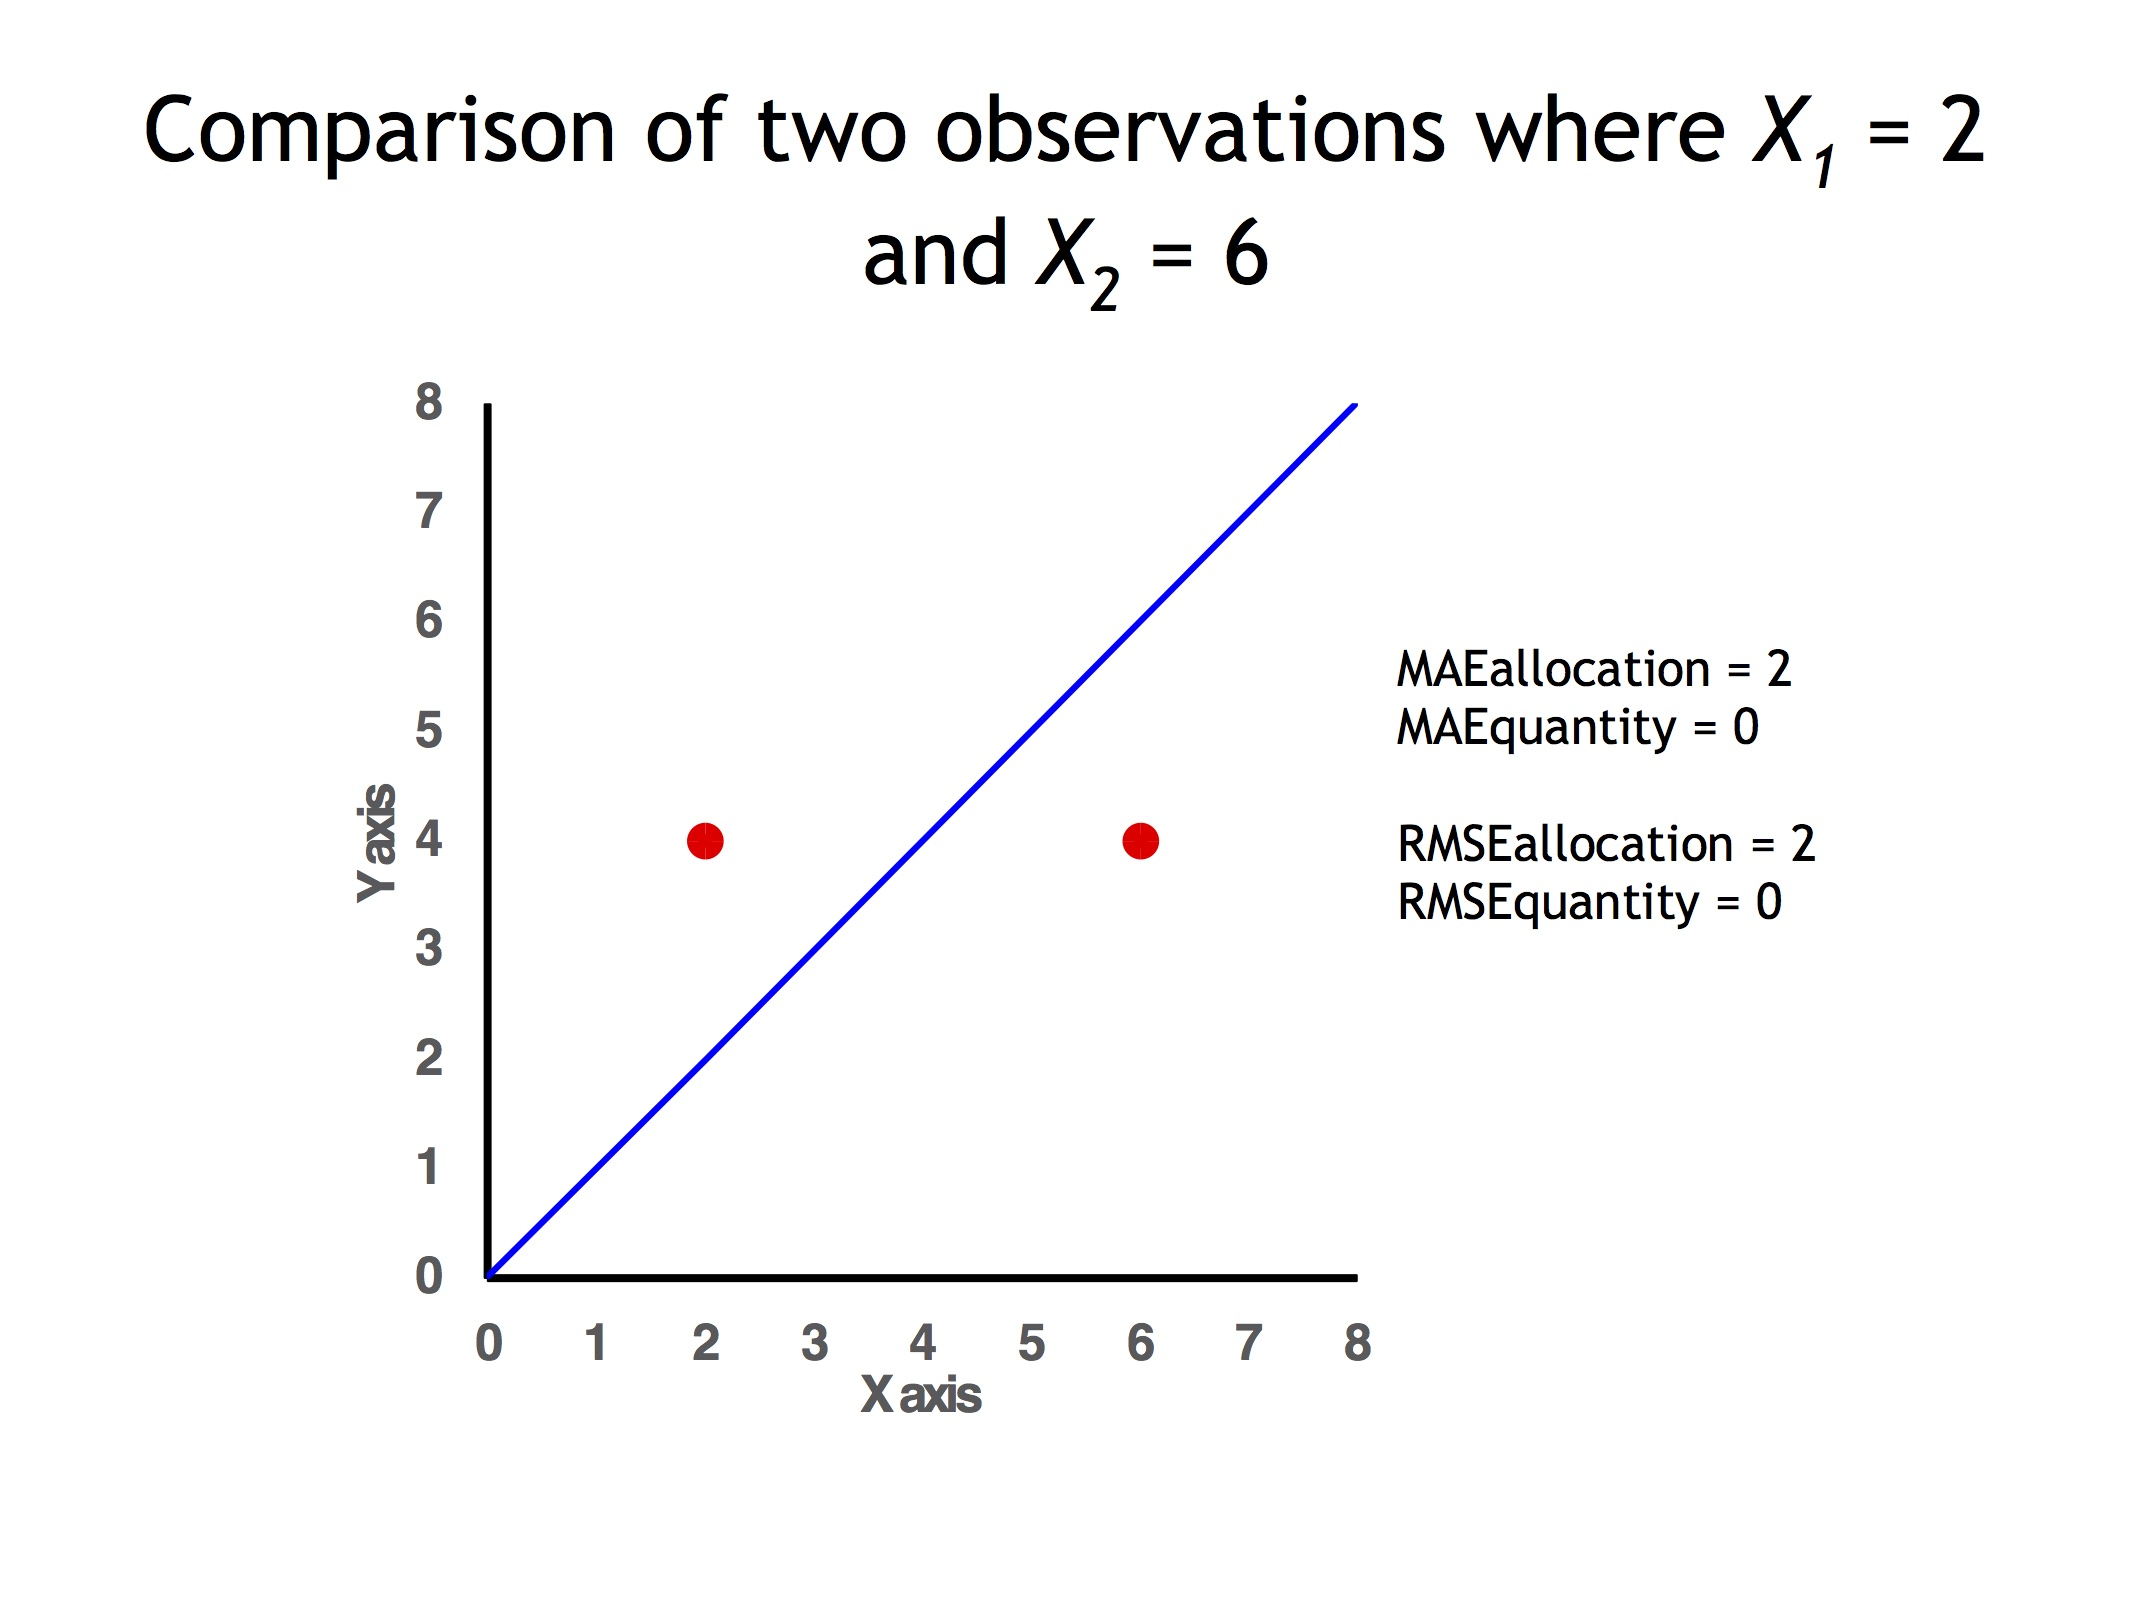

Source-> https://en.wikipedia.org/w/index.php?curid=53985082

Here, the red dots represents the predicted value and the line under the x-y axis is the expected value.

The distance between them is the actual value of our interest, that distance |yi-xi| (as mentioned above) is the error value. The summation and average of the all the values gives us the mean absolute error.
        
|e| = ( ∑ |yi-xi| ) / n 

Where, 
ei-> Absolute error
yi-> Perdicted Value
xi-> Observed Value

Also, summation is from 1 to n, n being the number of values.

------

### Mean Squared Error
Mean Squared Error (l2 norm or euclidean norm): Also known as root mean squared error is a performance metric working same as mean absolute error, but penalising large values more than the smaller ones in the error calculation. It just measures the standard deviation of residuals (perdicted-expected values).

The formula is same but with root of the mean absolute error.
MSE = √MAE = √|e| = √( ( ∑ |yi-xi| ) / n )

Where,
ei-> Absolute error
yi-> Perdicted Value
xi-> Observed Value

Also, summation is from 1 to n, n being the number of values.

------

### Let's build a linear regression model
### Objective: Predicting the house price using the attributes given in the dataset
------
### Importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression

import seaborn as sns

### Reading the dataset

In [2]:
# Dataset Source: https://www.kaggle.com/vedavyasv/usa-housing
data = pd.read_csv('housing.csv')
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [3]:
# Here we check if the dataset has any null values, if we have any we need to deal with it before going further 
# since it affects the performance of model later
data.isnull().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [4]:
# Info function helps us to know the attributes, it's datatype, number of entries, and count of null values if any
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [5]:
# Describe function gives us the statistical values of all the numerical attributes
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


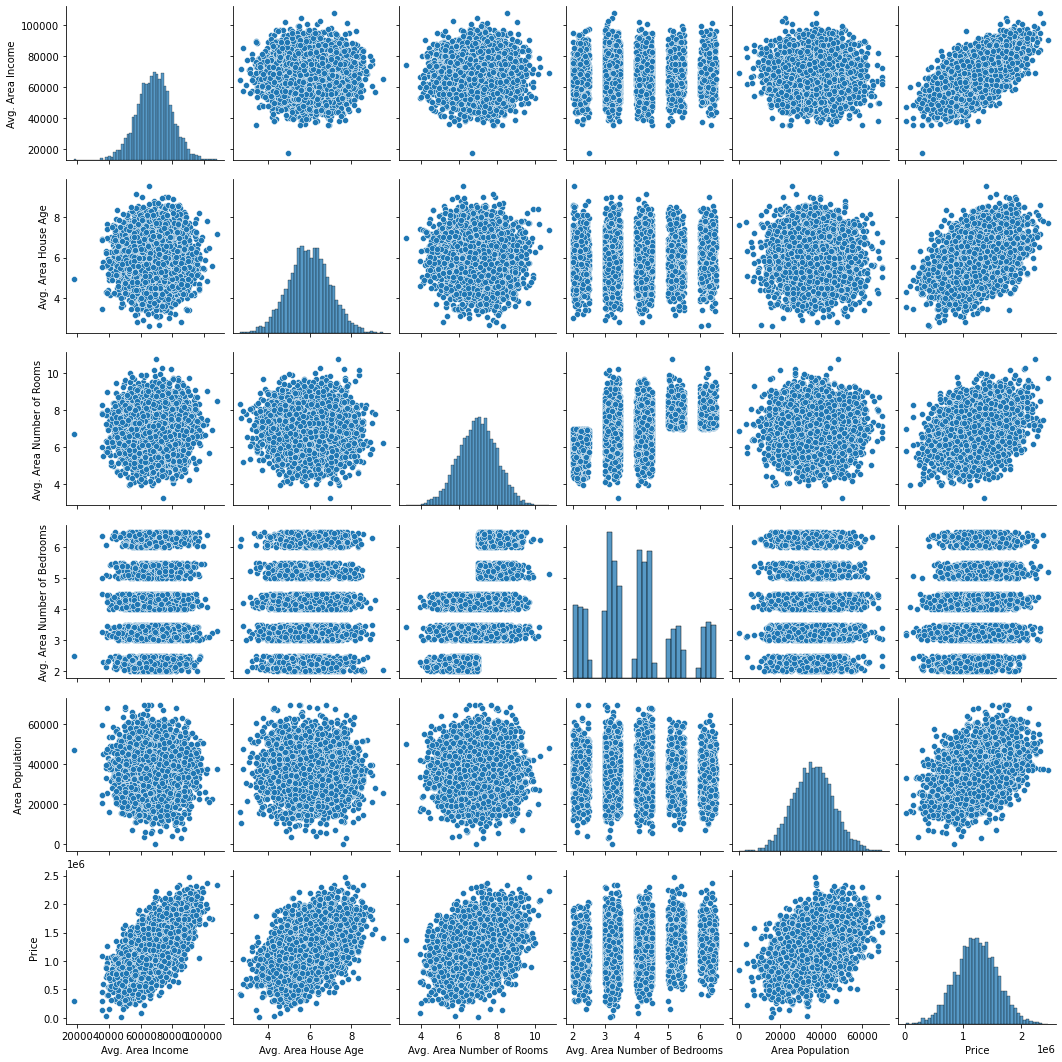

In [6]:
# This gives visualizantion of relationship between all numerical attributes of the dataset
sns.pairplot(data)

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64


(array([  11.,   88.,  344.,  804., 1313., 1252.,  793.,  314.,   68.,
          13.]),
 array([  15938.65792329,  261251.35154843,  506564.04517357,
         751876.73879871,  997189.43242385, 1242502.126049  ,
        1487814.81967414, 1733127.51329928, 1978440.20692442,
        2223752.90054956, 2469065.5941747 ]),
 <BarContainer object of 10 artists>)

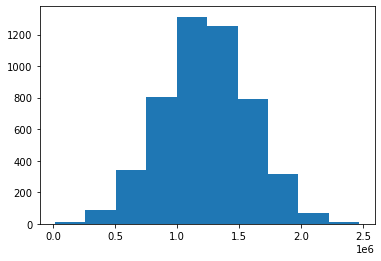

In [7]:
print(data['Price'].head())
plt.hist(data['Price'])

Text(0, 0.5, 'Prices')

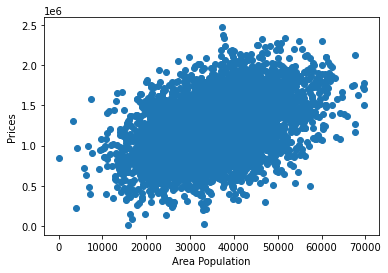

In [8]:
plt.scatter(data['Area Population'], data['Price'])
plt.xlabel("Area Population")
plt.ylabel("Prices")

Text(0, 0.5, 'Prices')

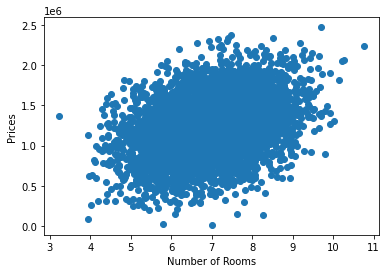

In [9]:
plt.scatter(data['Avg. Area Number of Rooms'], data['Price'])
plt.xlabel("Number of Rooms")
plt.ylabel("Prices")

In [10]:
# This function helps us to understand the extent of relationship of an attribute with another, if 0 there's no
# relationship
data.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


### Now we're prepping the train and test data for linear regression model

In [11]:
x = data[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms', 'Avg. Area Number of Bedrooms', 'Area Population']]
y = data['Price']

In [12]:
x.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472


In [13]:
y.head()

0    1.059034e+06
1    1.505891e+06
2    1.058988e+06
3    1.260617e+06
4    6.309435e+05
Name: Price, dtype: float64

In [14]:
# Splitting the data to train (80%) and test (20%)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [15]:
pipeline = Pipeline([('std_scalar', StandardScaler())])
x_train = pipeline.fit_transform(x_train)
x_test = pipeline.fit_transform(x_test)

In [16]:
lr = LinearRegression(normalize=True)
lr.fit(x_train,y_train)

LinearRegression(normalize=True)

In [17]:
# Now we check out the coefficients for all attributes which dictates the price holding all values but one would
# mean it's respective contribution to the increase of house price
print('Coefficients: ', lr.coef_)

# Also the variance score helps us understand the accuracy of the model, ie. what's predicted value when compared
# to it's expected value.
print('Variance score: ',lr.score(x_test, y_test))

Coefficients:  [231741.87665217 163580.77656614 120724.77138745   2992.44913541
 152235.90009699]
Variance score:  0.9160772178273376


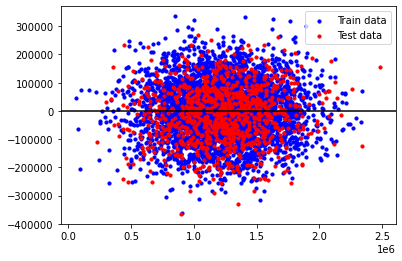

In [18]:
plt.scatter(lr.predict(x_train), lr.predict(x_train) - y_train, color = "blue", s = 10, label = 'Train data')
 
## plotting residual errors in test data
plt.scatter(lr.predict(x_test), lr.predict(x_test) - y_test, color = "red", s = 10, label = 'Test data')
plt.axhline(y = 0, color = 'black', linestyle = '-')
plt.legend(loc = 'upper right')
plt.show()

### Performance Metrics
----
#### Mean Absolute Error

In [19]:
pred = lr.predict(x_test)
mae = metrics.mean_absolute_error(y_test, pred)
mae

81539.13072852154

#### Mean Squared Error

In [20]:
pred = lr.predict(x_test)
mse = metrics.mean_squared_error(y_test, pred)
mse

10325225811.761524

### -------This concludes the topic-------